<a href="https://colab.research.google.com/github/Lavan1999/Project-9_SalesForecast/blob/main/Final_Project_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Forecast Project**

# **Libraries and Dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# For managing warning messages.
import warnings

# Data cleaning
import pandas as pd
import numpy as np
import ast           # To convert string to dictionary
import datetime

# Establishing database and file system connections.
from google.colab import drive

# Statistical analysis and hypothesis testing.
from scipy import stats

# Visualization / EDA
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# Saving trained models for future deployment.
import pickle

# Balancing the data to address class imbalance.
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils import resample

# For dimensionality reduction and feature extraction.
from sklearn.decomposition import PCA

# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning : Training
from xgboost import plot_importance
# Regression
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# Classification
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Cluster
from sklearn.cluster import KMeans

# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score # Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
ConfusionMatrixDisplay, classification_report # Classification

# **Data Loading**

In [ ]:
import pandas as pd
sales_path = '/content/drive/My Drive/MDTM15/Raw Datasets/Sales_forecast/sales_data_set.csv'
stores_path = '/content/drive/My Drive/MDTM15/Raw Datasets/Sales_forecast/stores_data_set.csv'
features_path = '/content/drive/My Drive/MDTM15/Raw Datasets/Sales_forecast/Features_data_set.csv'
sales_df = pd.read_csv(sales_path)
stores_df = pd.read_csv(stores_path)
features_df = pd.read_csv(features_path)


# **EDA- Exploratory Data Analysis**

## **Stores_DataFrame**

In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
stores_df.shape

(45, 3)

In [ ]:
stores_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


## **Sale_DataFrame**

In [ ]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
sales_df.shape

(421570, 5)

In [ ]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


## **Features_DataFrame**

In [ ]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
features_df.shape

(8190, 12)

In [ ]:
features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


## **Data Cleaning**


In [ ]:
features_df.MarkDown1.fillna(0, inplace = True)
features_df.MarkDown2.fillna(0, inplace = True)
features_df.MarkDown3.fillna(0, inplace = True)
features_df.MarkDown4.fillna(0, inplace = True)
features_df.MarkDown5.fillna(0, inplace = True)

In [ ]:
features_df['CPI'].fillna(method='ffill', inplace=True)
features_df['Unemployment'].fillna(method = 'ffill', inplace = True)

In [ ]:
features_df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

# **Merging Datasets**

Here, I merged three datasets—features_df, sales_df, and stores_df—to create a comprehensive DataFrame that combines sales data, feature data, and store information based on shared columns like Store, Date, and IsHoliday.

In [ ]:
merged_df = pd.merge(features_df, sales_df, on=['Store', 'Date','IsHoliday'])
df = pd.merge(merged_df, stores_df, on=['Store'])

In [ ]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


Checking the data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


I converted all column names in the DataFrame df to lowercase to ensure consistency and simplify column referencing.

In [ ]:
# Convert column names to lowercase
df.columns = map(str.lower, df.columns)

I converted the 'date' column in the DataFrame df to a datetime format using the specified date format ('%d/%m/%Y'). Then, I extracted the unique years from the 'date' column and printed them. This helps in analyzing data across different years.

In [ ]:
# Convert 'date' column to datetime with the correct format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract unique years
unique_years = df['date'].dt.year.unique()

print(unique_years)

[2010 2011 2012]


 I extracted and displayed the unique store identifiers from the 'store' column in the DataFrame df. This helps to identify all the distinct stores present in the dataset.

In [ ]:
df.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
import numpy as np
x = np.array(sorted(df.dept.unique()))
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
df.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday', 'dept', 'weekly_sales', 'type', 'size'],
      dtype='object')

In [ ]:
df['type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
df.isholiday.unique()

array([False,  True])

In [ ]:
category_column = ['store','type','dept','isholiday']
continuous_columns = ['temperature','fues_price','markdown1', 'markdown2','markdown3','markdown4','markdown5','cpi',
                      'weekly_sales','size']

In [ ]:
string_columns = df.select_dtypes(exclude = ['int64','float64','datetime64[ns]']).columns
numeric_columns = df.select_dtypes(include = ['int64','float64']).columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  int64         
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  isholiday     421570 non-null  bool          
 12  dept          421570 non-null  int64         
 13  weekly_sales  421570 non-null  float64       
 14  type          421570 non-null  object        
 15  size          421

 I calculated the total number of missing (null) values in the entire DataFrame df by summing up the counts of null values for each column and then summing those counts together. The output being 0 indicates that there are no missing values in the dataset.



In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
date,421570,2011-06-18 08:30:31.963375360,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
fuel_price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
markdown1,421570.0,2590.074819,0.0,0.0,0.0,2809.05,88646.76,6052.385934
markdown2,421570.0,879.974298,-265.76,0.0,0.0,2.2,104519.54,5084.538801
markdown3,421570.0,468.087665,-29.1,0.0,0.0,4.54,141630.61,5528.873453
markdown4,421570.0,1083.132268,0.0,0.0,0.0,425.29,67474.85,3894.529945
markdown5,421570.0,1662.772385,0.0,0.0,0.0,2168.04,108519.28,4207.629321
cpi,421570.0,171.201947,126.064,132.022667,182.31878,212.416993,227.232807,39.159276


In [ ]:
df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


I checked the data types of each column in the DataFrame df to understand how the data is represented.

In [ ]:
df.dtypes

store                    int64
date            datetime64[ns]
temperature            float64
fuel_price             float64
markdown1              float64
markdown2              float64
markdown3              float64
markdown4              float64
markdown5              float64
cpi                    float64
unemployment           float64
isholiday                 bool
dept                     int64
weekly_sales           float64
type                    object
size                     int64
dtype: object

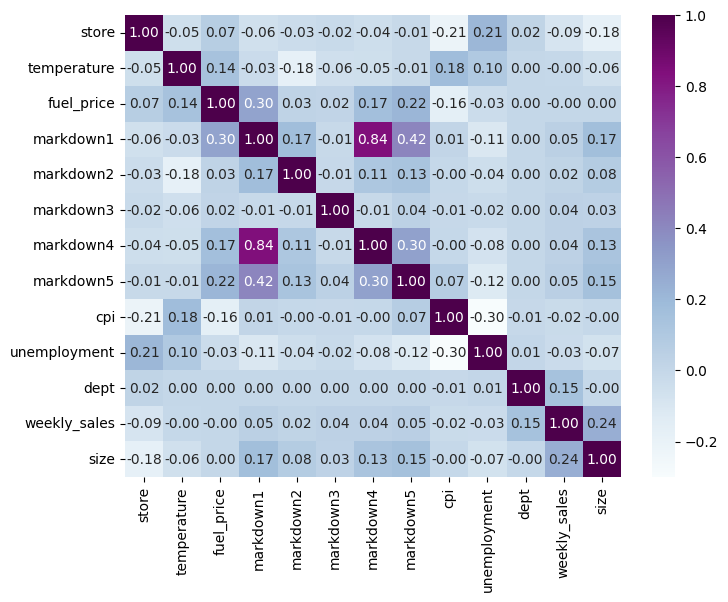

In [ ]:
# Numerical Data
corr_= df[numeric_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

In [ ]:
pip install --upgrade matplotlib

I generated count plots to analyze the distribution of the specified categorical features ('type', 'size', and 'store') in the DataFrame df using Seaborn and Matplotlib. These plots visualize the frequency of each category, aiding in the analysis of the dataset.

By analyzing the count plot for the 'type' feature, it becomes evident that category 'a' is the most prevalent, followed by category 'b', with category 'c' showing the lowest count. This observation offers valuable insights into the distribution of types across the dataset.

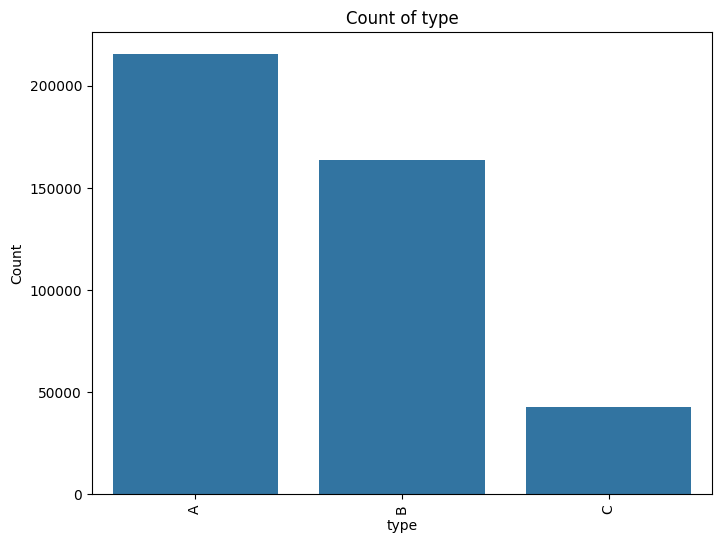

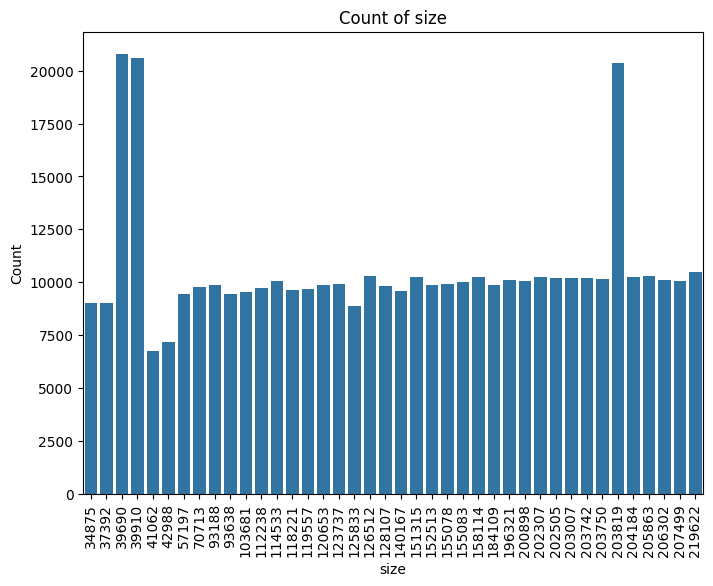

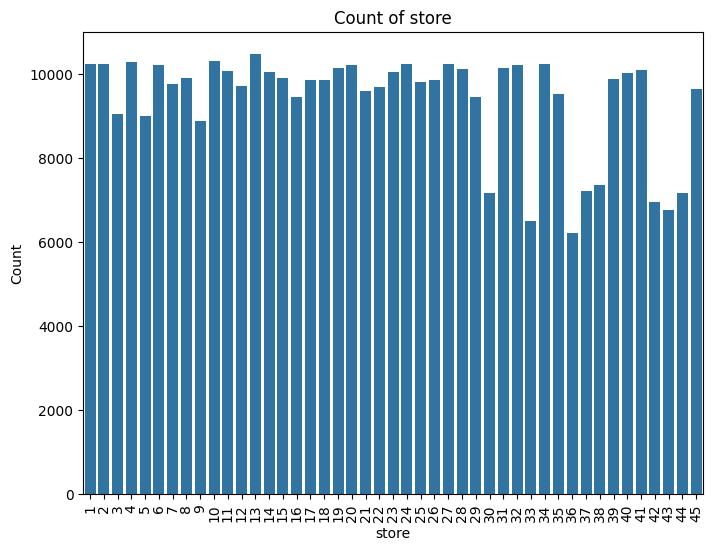

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features for which you want bar plots
category_column = ['type','size','store']

# Loop through each feature and create a count plot
for feature in category_column:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

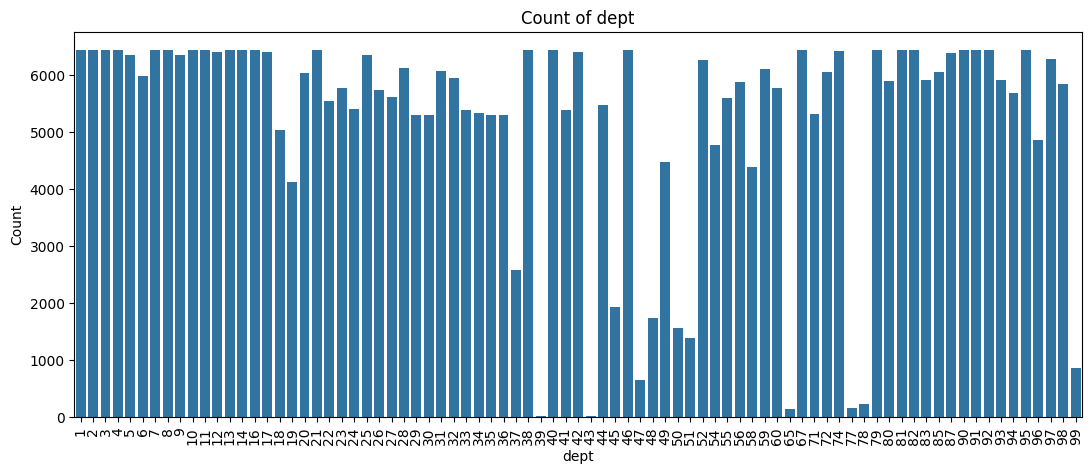

In [ ]:
# Specify the features for which you want bar plots
category_column = ['dept']

# Loop through each feature and create a count plot
for feature in category_column:
    plt.figure(figsize=(13, 5))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

Departments 39, 43, 47, 65, 77, 78, and 99 are not frequently utilized across most stores. Avoiding these departments for future stores could lead to better profitability and prevent potential losses for the business

---


In [ ]:
data = df[df['type']=='C']
data

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size
286548,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,1,10158.77,C,42988
286549,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,2,12745.86,C,42988
286550,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,3,1052.98,C,42988
286551,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,4,14058.94,C,42988
286552,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,5,318.00,C,42988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411928,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,94,26641.59,C,39910
411929,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,95,32196.45,C,39910
411930,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,96,2983.19,C,39910
411931,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,97,7054.80,C,39910


In [ ]:
data.shape

(42597, 16)

In [ ]:
data.store.value_counts()

store
38    7362
37    7206
44    7169
30    7156
42    6953
43    6751
Name: count, dtype: int64

In [ ]:
data.dept.value_counts()

dept
1     858
92    858
91    858
38    858
40    858
     ... 
99     21
29     16
71     16
19      1
35      1
Name: count, Length: 66, dtype: int64

In [ ]:
data.dept.value_counts()

dept
1     858
92    858
91    858
38    858
40    858
     ... 
99     21
29     16
71     16
19      1
35      1
Name: count, Length: 66, dtype: int64

## features by weekly sales

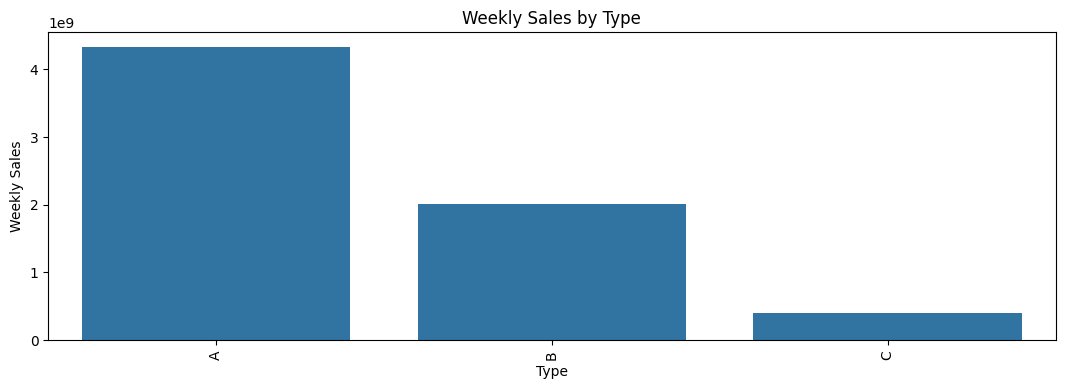

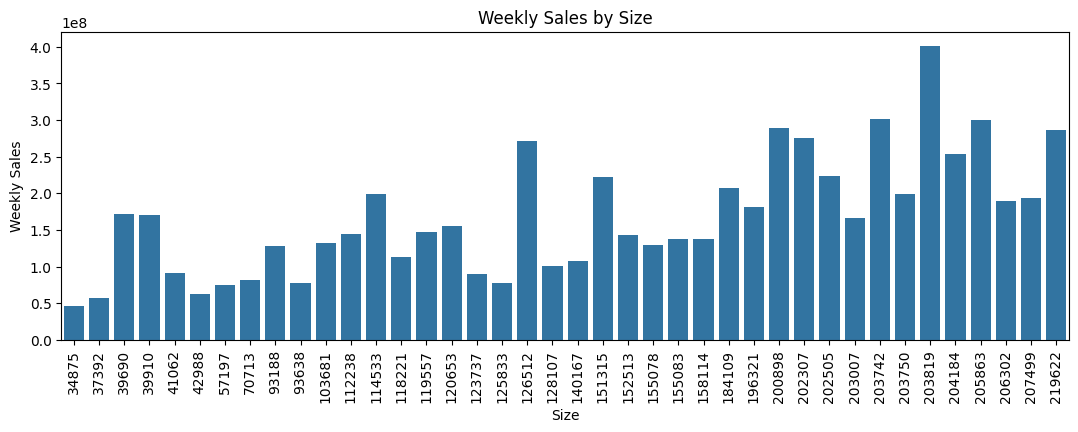

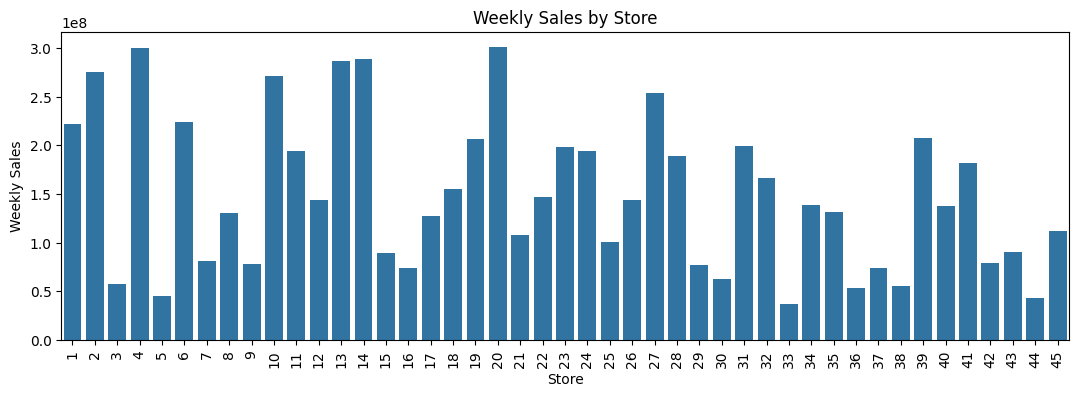

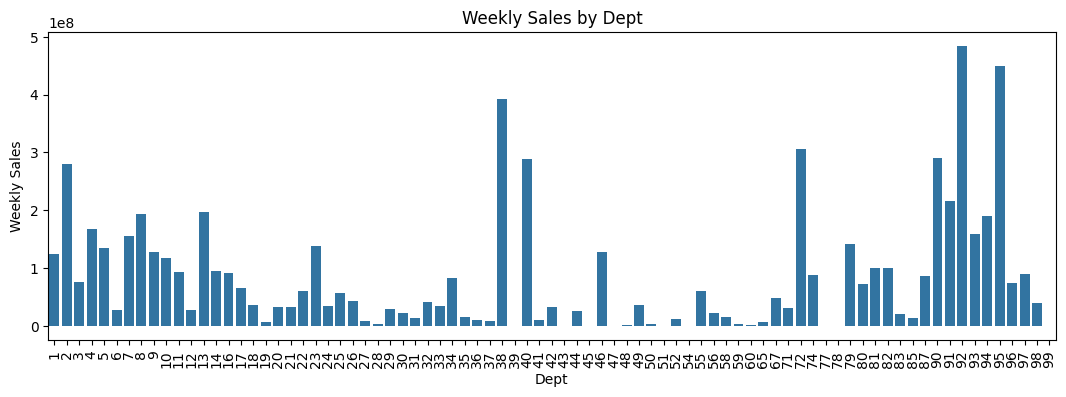

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Specify the features for which you want bar plots
category_columns = ['type', 'size', 'store','dept']

# Loop through each feature and create a bar plot with 'weekly sales' as y-label
for feature in category_columns:
    plt.figure(figsize=(13, 4))

    # Aggregate the weekly sales by the feature
    agg_df = df.groupby(feature)['weekly_sales'].sum().reset_index()

    sns.barplot(x=feature, y='weekly_sales', data=agg_df)
    plt.title(f'Weekly Sales by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
df.type.unique()

array(['A', 'B', 'C'], dtype=object)

Type A has the lowest weekly sales

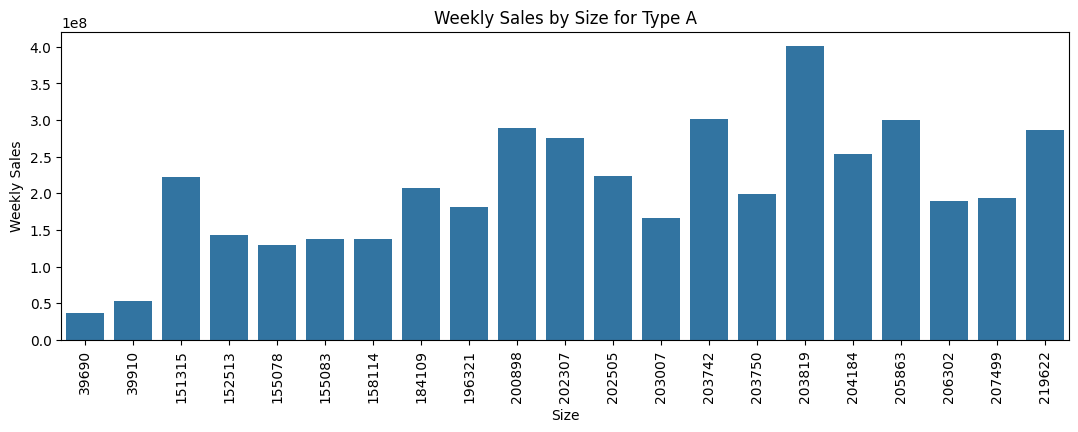

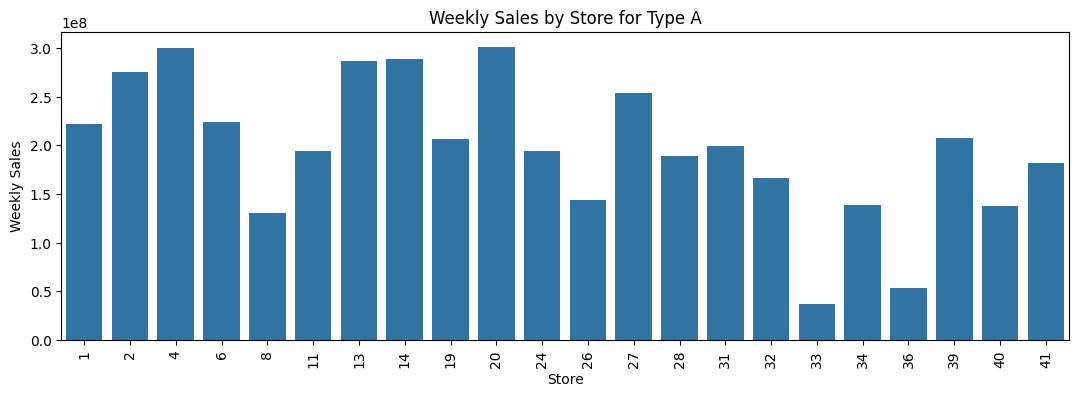

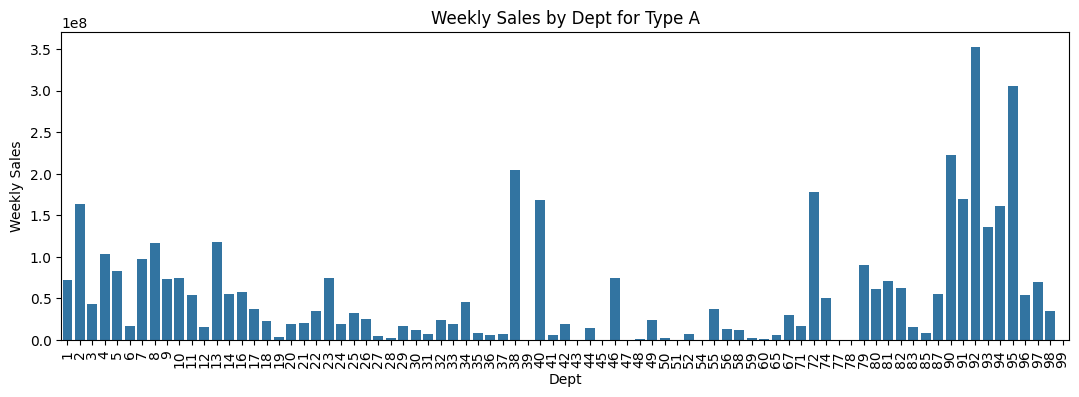

In [ ]:
# Assuming df is your DataFrame and it contains a column named 'type'
# Filter the DataFrame to only include rows where 'type' is 'A'
df_type_a = df[df['type'] == 'A']

# Specify the features for which you want bar plots
category_columns = ['size', 'store', 'dept']

# Loop through each feature and create a bar plot with 'weekly_sales' as y-label
for feature in category_columns:
    plt.figure(figsize=(13, 4))

    # Aggregate the weekly sales by the feature
    agg_df = df_type_a.groupby(feature)['weekly_sales'].sum().reset_index()

    sns.barplot(x=feature, y='weekly_sales', data=agg_df)
    plt.title(f'Weekly Sales by {feature.capitalize()} for Type A')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()

For future forecasting endeavors, it's advisable to strategize openings in 'A' type cities, which often denote high-performing locations. Prioritize establishing large-sized stores in these areas. Furthermore, focus on departments commonly frequented across stores, including departments 1-13, 23, 40, 46, 72, and 90-95. Incorporating these departments into future store layouts could bolster profitability and safeguard against potential losses, ensuring a more robust business outlook.

---



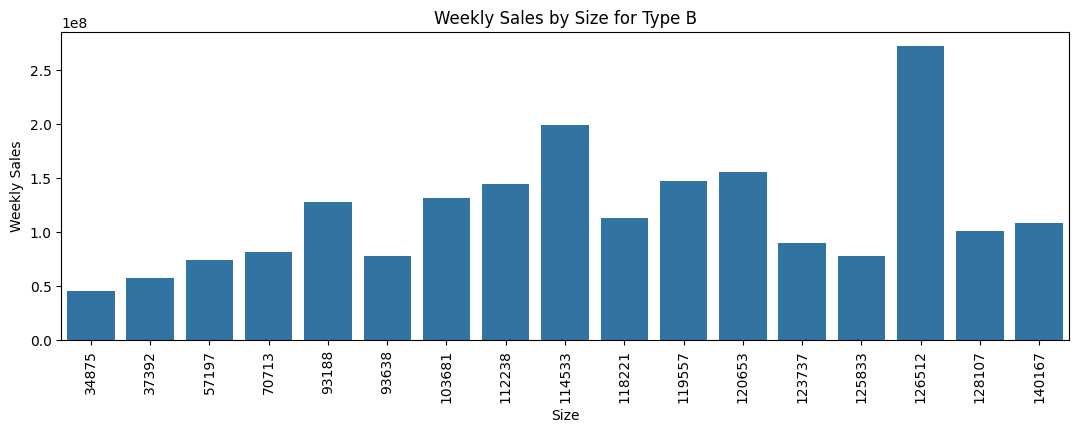

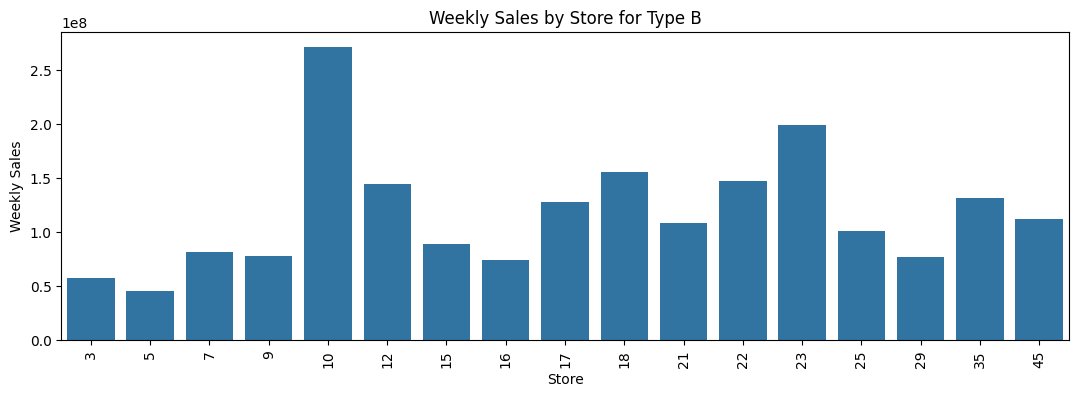

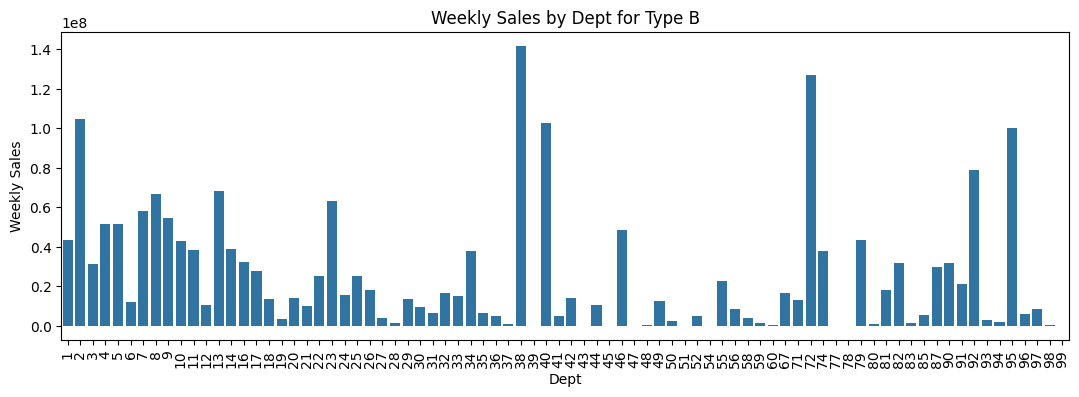

In [ ]:
# Assuming df is your DataFrame and it contains a column named 'type'
# Filter the DataFrame to only include rows where 'type' is 'B'
df_type_b = df[df['type'] == 'B']

# Specify the features for which you want bar plots
category_columns = ['size', 'store', 'dept']

# Loop through each feature and create a bar plot with 'weekly_sales' as y-label
for feature in category_columns:
    plt.figure(figsize=(13, 4))

    # Aggregate the weekly sales by the feature
    agg_df = df_type_b.groupby(feature)['weekly_sales'].sum().reset_index()

    sns.barplot(x=feature, y='weekly_sales', data=agg_df)
    plt.title(f'Weekly Sales by {feature.capitalize()} for Type B')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()

For future forecasting endeavors, it's advisable to strategize openings in 'B' type cities, which often denote high-performing locations. Prioritize establishing large-sized stores in these areas. Furthermore, focus on departments commonly frequented across stores, including departments 1-14,23,38,40,72,92,95. Incorporating these departments into future store layouts could bolster profitability and safeguard against potential losses, ensuring a more robust business outlook.

---



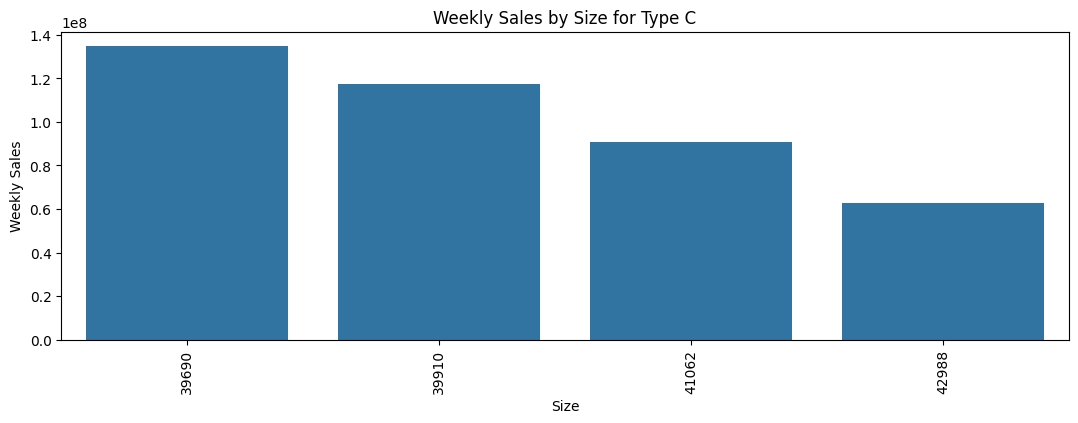

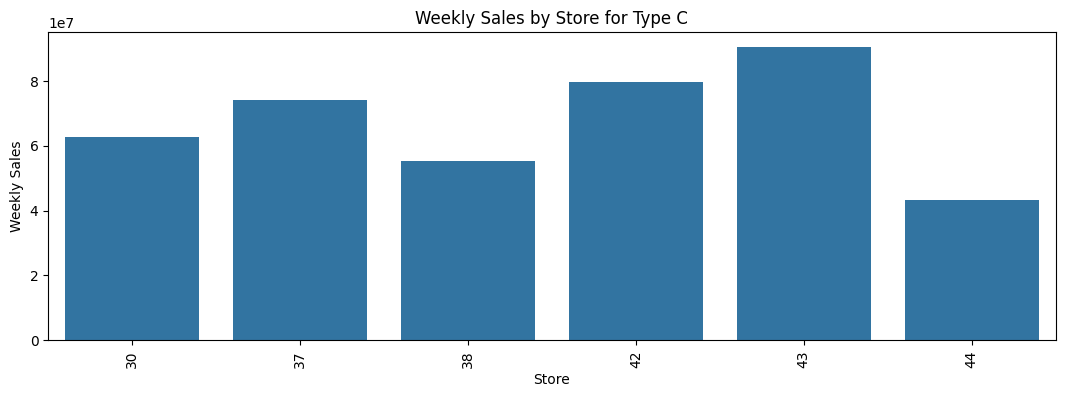

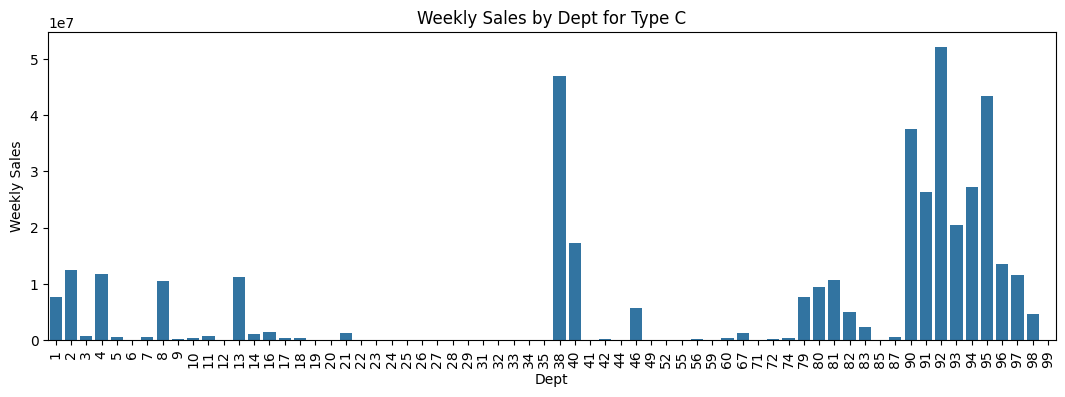

In [ ]:
# Assuming df is your DataFrame and it contains a column named 'type'
# Filter the DataFrame to only include rows where 'type' is 'C'
df_type_c = df[df['type'] == 'C']

# Specify the features for which you want bar plots
category_columns = ['size', 'store', 'dept']

# Loop through each feature and create a bar plot with 'weekly_sales' as y-label
for feature in category_columns:
    plt.figure(figsize=(13, 4))

    # Aggregate the weekly sales by the feature
    agg_df = df_type_b.groupby(feature)['weekly_sales'].sum().reset_index()

    sns.barplot(x=feature, y='weekly_sales', data=agg_df)
    plt.title(f'Weekly Sales by {feature.capitalize()} for Type C')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()

For future forecasting endeavors, it's advisable to strategize openings in 'C' type cities, which often denote high-performing locations. Prioritize establishing large-sized stores in these areas. Furthermore, focus on departments commonly frequented across stores, including departments 38,40,72,90-95. Incorporating these departments into future store layouts could bolster profitability and safeguard against potential losses, ensuring a more robust business outlook.


---



In [ ]:
df[df['dept']==93]['weekly_sales'].sum()

159698663.19

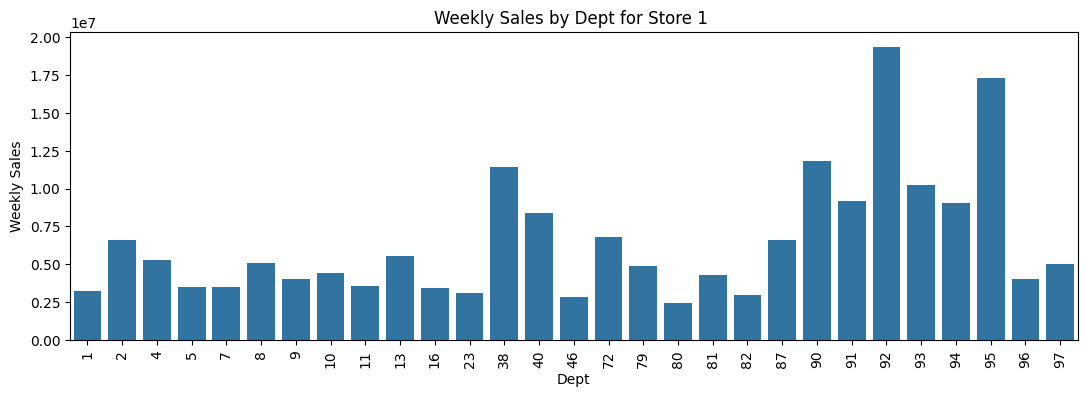

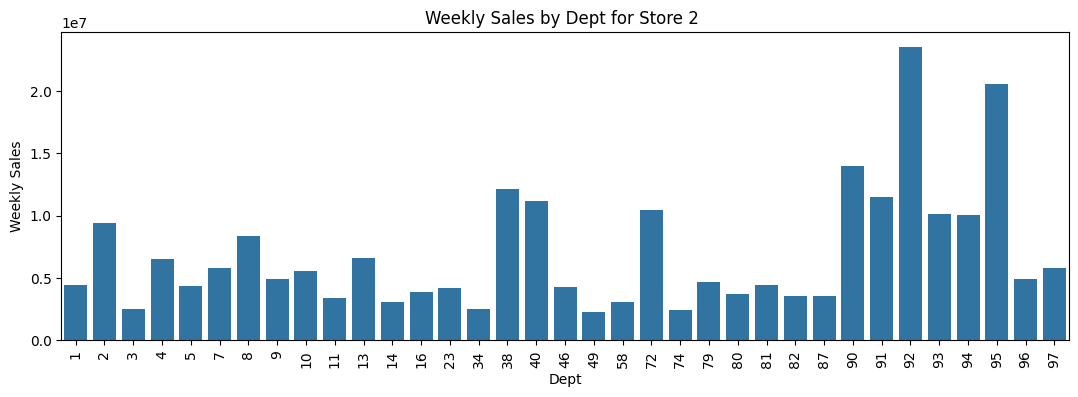

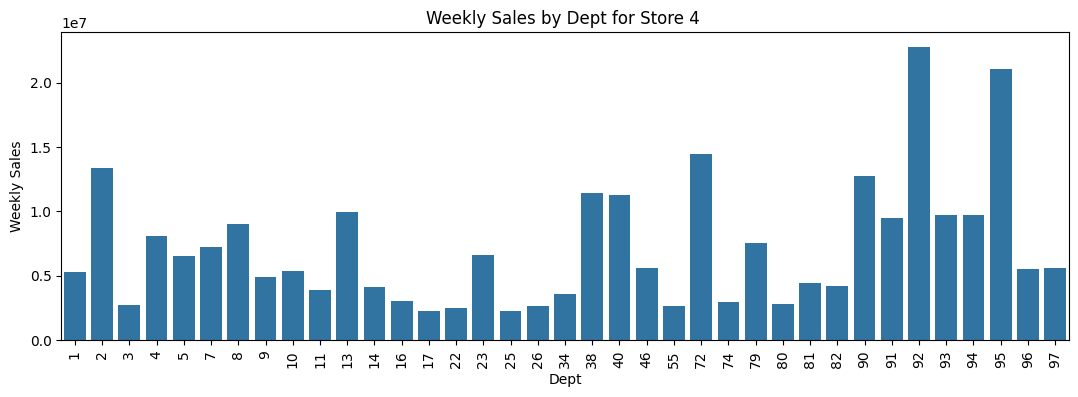

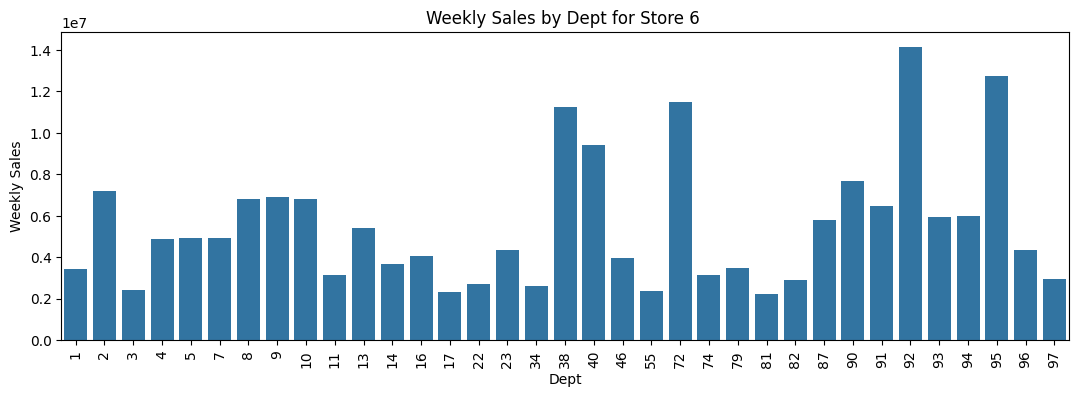

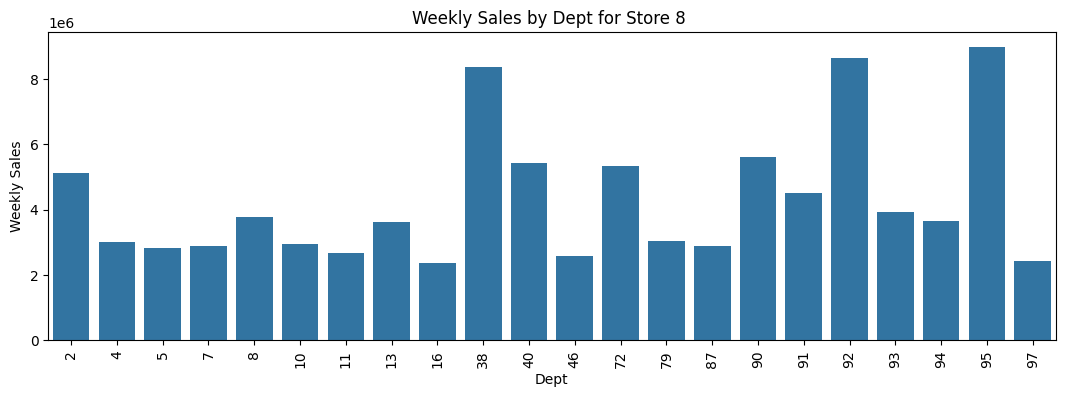

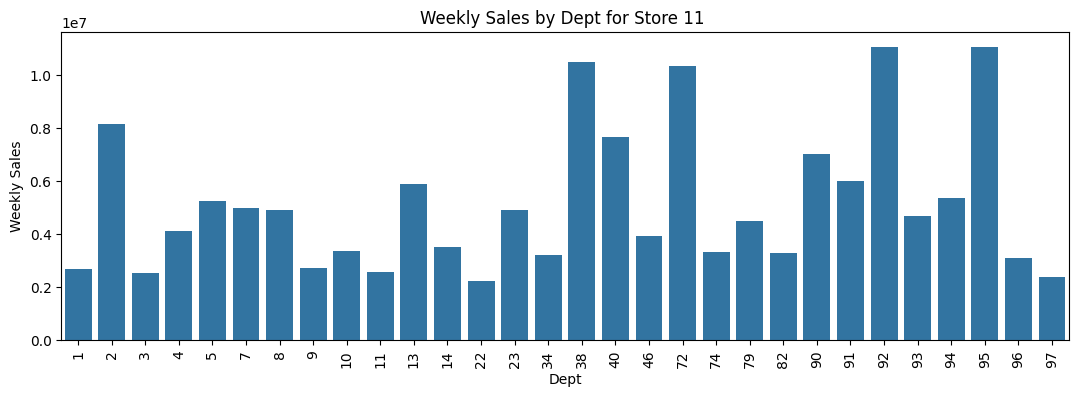

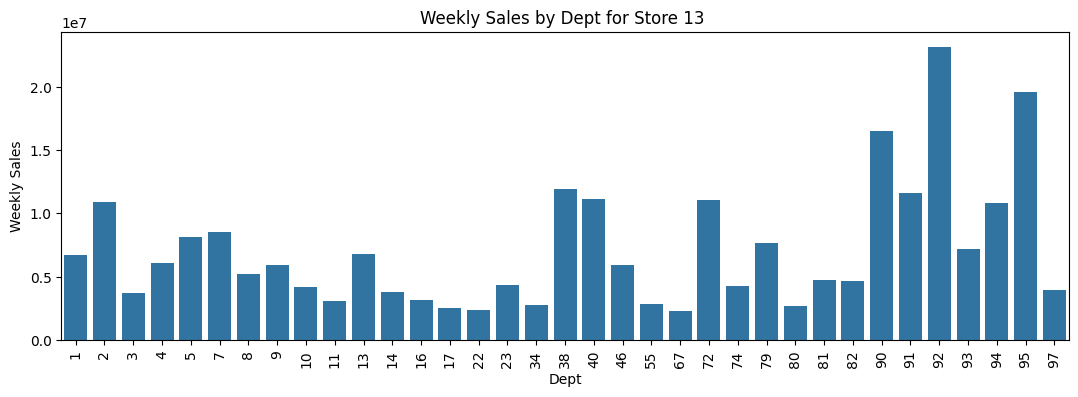

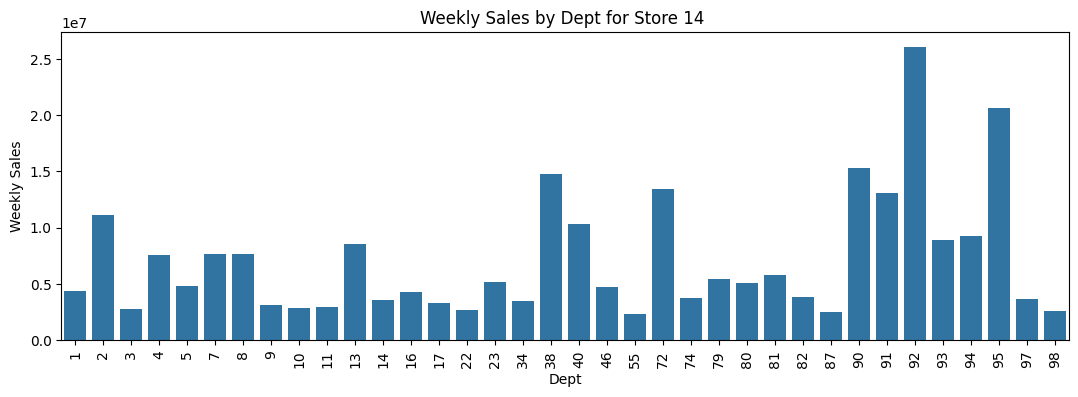

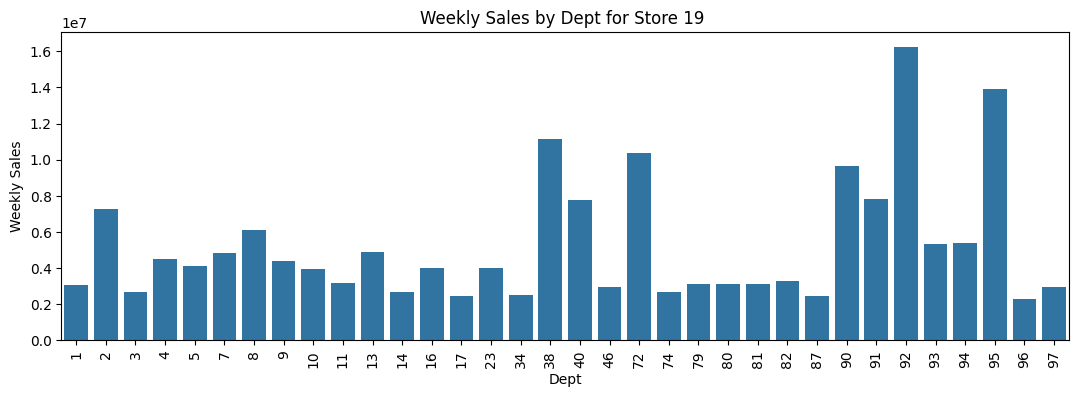

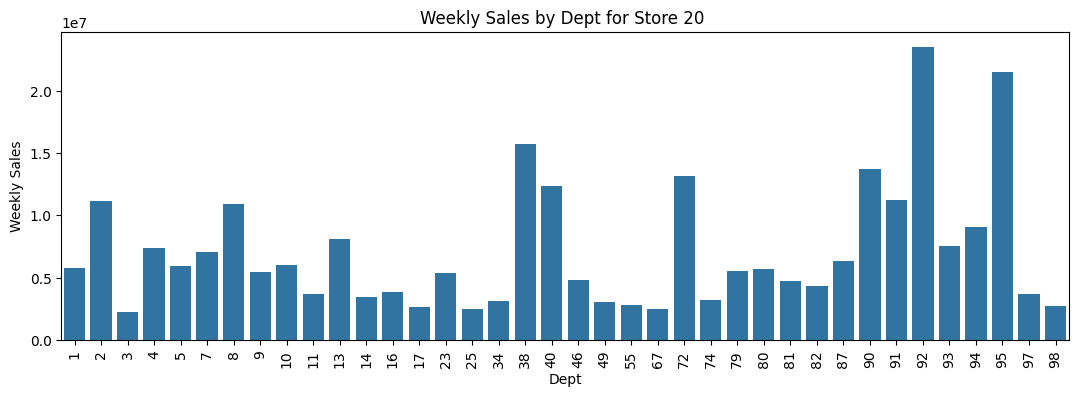

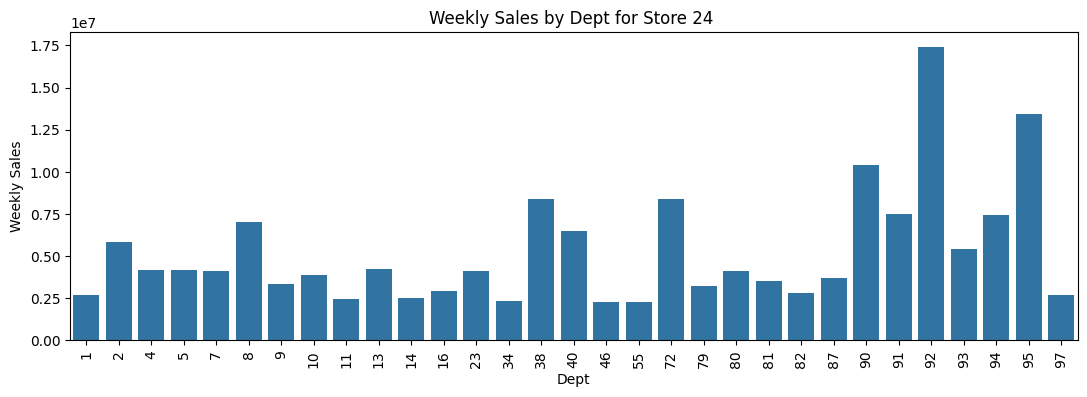

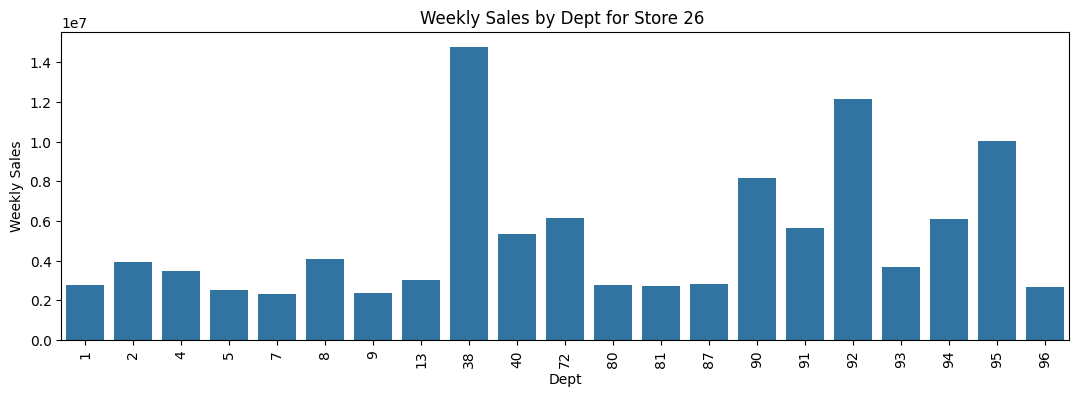

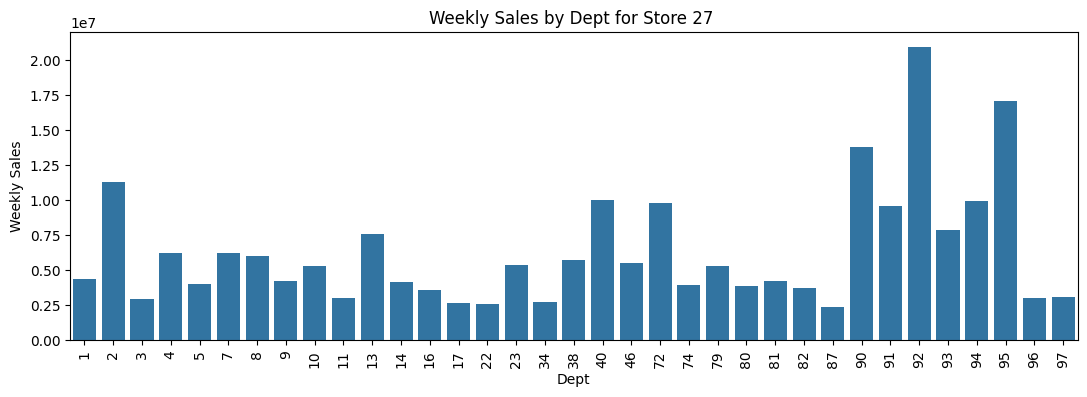

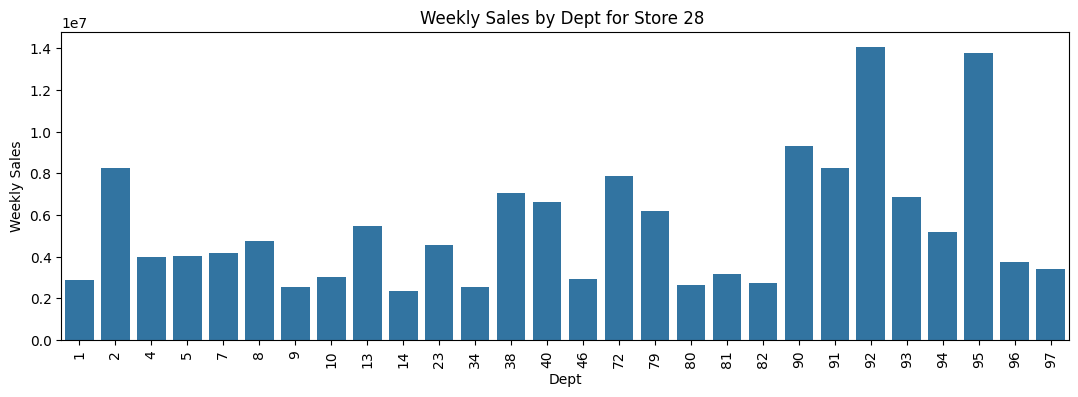

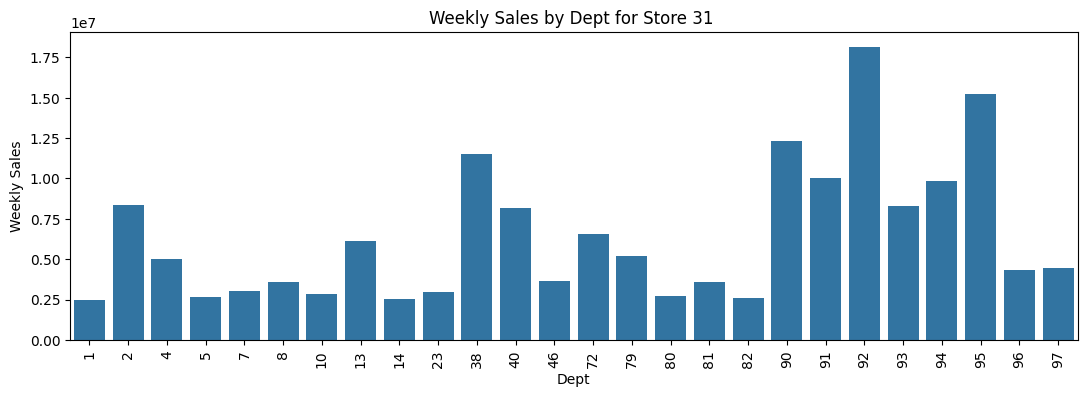

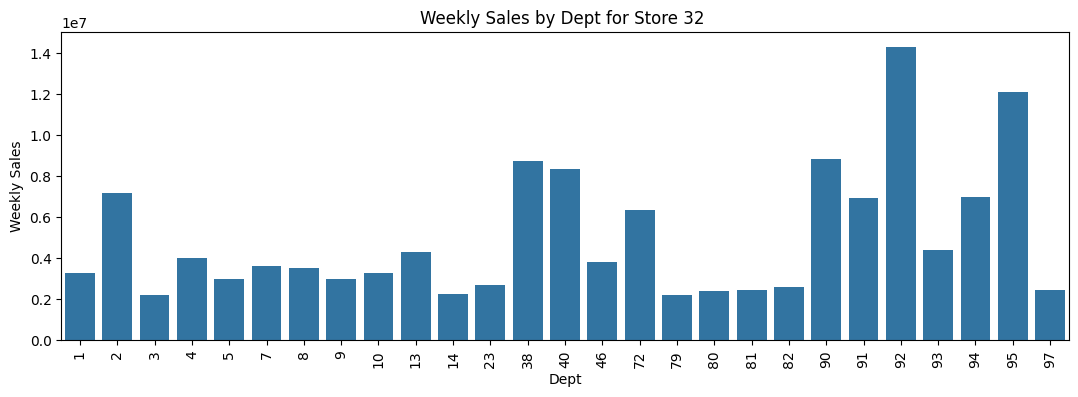

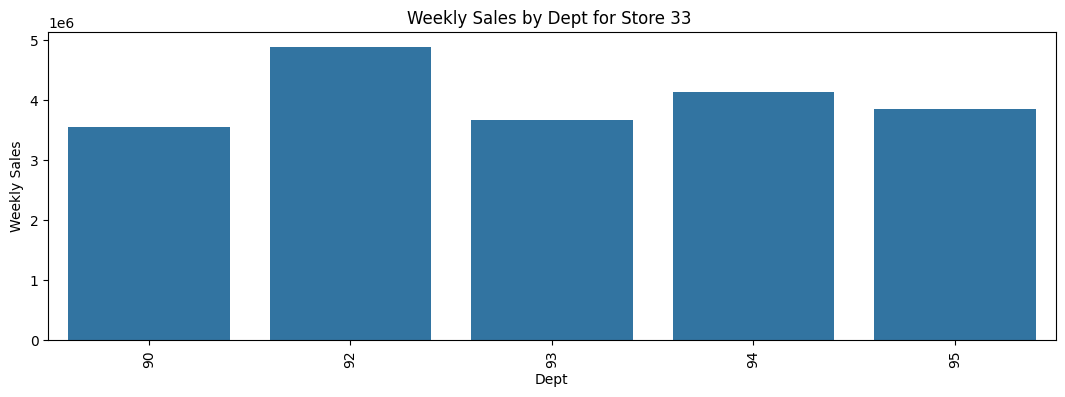

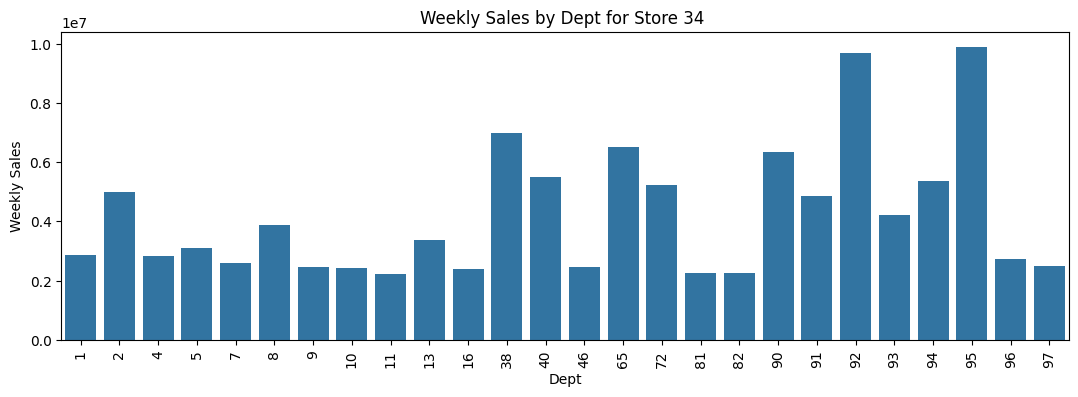

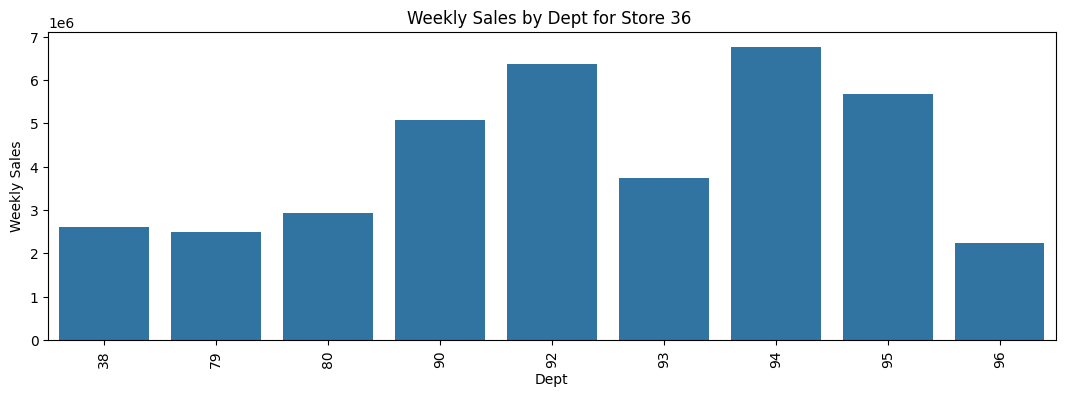

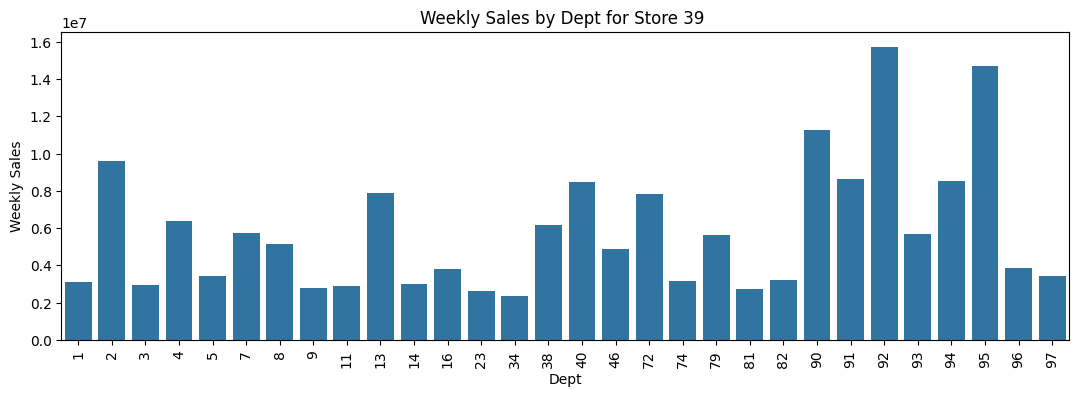

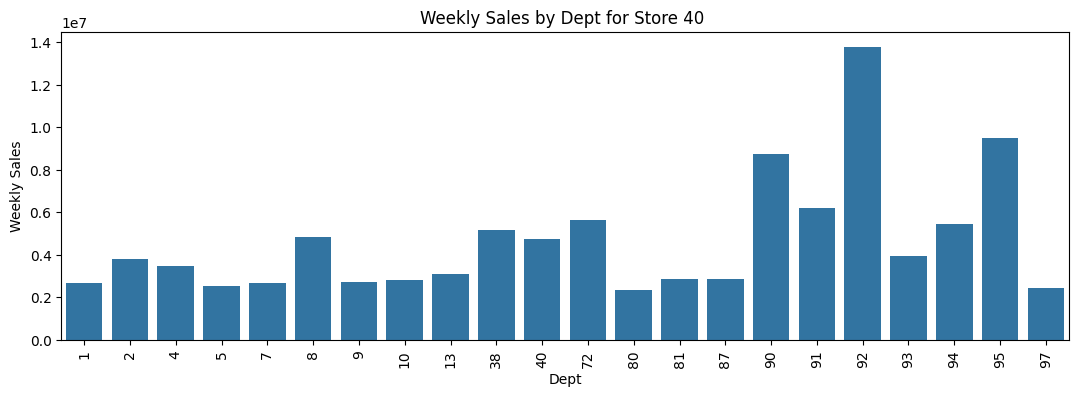

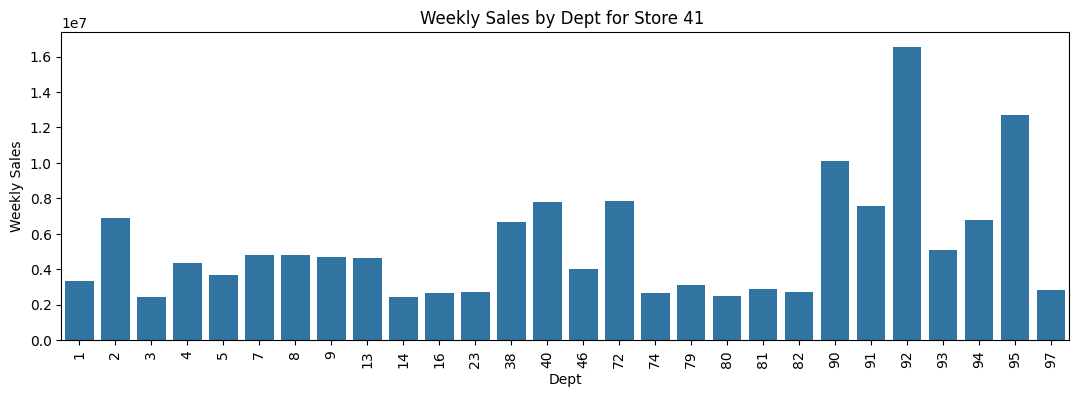

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it contains columns named 'type', 'store', 'dept', and 'weekly_sales'
# Filter the DataFrame to only include rows where 'type' is 'A'
df_type_a = df[df['type'] == 'A']

# Aggregate the weekly sales by 'store' and 'dept', and filter for departments with sales greater than 2500 for each store
agg_df = df_type_a.groupby(['store', 'dept'])['weekly_sales'].sum().reset_index()
agg_df_filtered = agg_df[agg_df['weekly_sales'] > 2.209878e+06]

# Get unique stores
stores = agg_df_filtered['store'].unique()

# Loop through each store and create a bar plot for its departments
for store in stores:
    plt.figure(figsize=(13, 4))

    # Filter data for the current store
    store_data = agg_df_filtered[agg_df_filtered['store'] == store]

    sns.barplot(x='dept', y='weekly_sales', data=store_data)
    plt.title(f'Weekly Sales by Dept for Store {store} ')
    plt.xlabel('Dept')
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.show()


The majority of weekly sales are concentrated within departments 90 to 95.

---



In [ ]:
agg_df.describe()

,store,dept,weekly_sales
count,1671.000000,1671.000000,1.671000e+03
mean,21.966487,45.884500,2.591870e+06
std,12.775072,29.982337,3.538168e+06
min,1.000000,1.000000,-2.562000e+03
25%,11.000000,21.000000,3.276960e+05
50%,24.000000,41.000000,1.209878e+06
75%,33.000000,74.000000,3.422059e+06
max,41.000000,99.000000,2.610150e+07


#Identifying Average customer visit in the type B store in April Months

In [ ]:

# Filter for Type B stores
df_type_b = df[df['type'] == 'B']

# Filter for the month of April
df_type_b_april = df_type_b[df_type_b['date'].dt.month == 4]

# Calculate the average Weekly_Sales (assuming it represents customer visits)
average_sales_april = df_type_b_april['weekly_sales'].mean()

average_sales_april

11924.820053101768

#Identifying Best average sales in holiday week for all store types

In [ ]:
# Filter for holiday weeks
df_holiday = df[df['isholiday'] == True]

# Group by store type and calculate the average sales
average_sales_holiday = df_holiday.groupby('type')['weekly_sales'].mean()

# Identify the store type with the highest average sales
best_avg_sales_type = average_sales_holiday.idxmax()
best_avg_sales_value = average_sales_holiday.max()

best_avg_sales_type, best_avg_sales_value

('A', 21297.51782416859)

#Finding Which store had a worst sales in leap year

In [ ]:
# Define the leap years we are interested in
leap_years = [year for year in range(2000, 2101) if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)]

# Filter for data in leap years
df_leap_years = df[df['date'].dt.year.isin(leap_years)]

# Check if the filtered DataFrame is empty
if df_leap_years.empty:
    print("No data available for leap years in the dataset.")
else:
    # Aggregate sales data by store
    store_sales_leap_years = df_leap_years.groupby('store')['weekly_sales'].sum()

    # Identify the store with the worst (lowest) total sales
    worst_sales_store = store_sales_leap_years.idxmin()
    worst_sales_value = store_sales_leap_years.min()

    print(f"Store with the worst sales in leap years: {worst_sales_store}")
    print(f"Worst sales value in leap years: {worst_sales_value}")

Store with the worst sales in leap years: 33
Worst sales value in leap years: 11435551.03


In [ ]:
# Find the store with the maximum sum of weekly sales
max_store = df.groupby('store')['weekly_sales'].sum().idxmax()

# Calculate 25% of the weekly sales of the store with the maximum sum
threshold = 0.25 * df.groupby('store')['weekly_sales'].sum().loc[max_store]

# Filter out the stores below 25% of the max store's weekly sales
below_threshold_stores = df.groupby('store')['weekly_sales'].sum().loc[lambda x: x < threshold].index

print("Stores below 25% of the store with the maximum sum of weekly sales:")
print(below_threshold_stores)

Stores below 25% of the store with the maximum sum of weekly sales:
Index([3, 5, 16, 30, 33, 36, 37, 38, 44], dtype='int64', name='store')


In [ ]:
# Filter out the rows for the stores below 25% of the max store's weekly sales
below_threshold_stores_df = df[df['store'].isin(below_threshold_stores)]

# Get the types of these stores
store_types = below_threshold_stores_df.groupby('store')['type'].first()

print("Types of stores below 25% of the store with the maximum sum of weekly sales:")
print(store_types)


Types of stores below 25% of the store with the maximum sum of weekly sales:
store
3     B
5     B
16    B
30    C
33    A
36    A
37    C
38    C
44    C
Name: type, dtype: object


#Identifying, What is the expected sales of each department when unemployment factor is greater>8

In [ ]:
# Define the unemployment rate threshold
unemployment_threshold = df['unemployment'].mean()  # or set a specific threshold value

# Filter the dataset based on the unemployment rate
filtered_df = df[df['unemployment'] > unemployment_threshold]

# Group by department and calculate the mean sales
expected_sales_by_dept = filtered_df.groupby('dept')['weekly_sales'].mean()

print("Expected sales of each department when the unemployment factor is greater than the threshold:")
print(expected_sales_by_dept)

Expected sales of each department when the unemployment factor is greater than the threshold:
dept
1     17723.870339
2     43438.570078
3     11094.697130
4     25120.851801
5     19859.029007
          ...     
95    68615.460195
96    15571.326511
97    13150.591941
98     6266.336566
99      340.256400
Name: weekly_sales, Length: 81, dtype: float64


# Aggregating the net(total) sales of each department on month wise

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column for the month-year
df['month_year'] = df['date'].dt.to_period('M')

# Group by the new month-year column and department, and aggregate the sales by summing them
monthly_sales = df.groupby(['month_year', 'dept'])['weekly_sales'].sum().reset_index()

print("Monthly net sales of each department:")
print(monthly_sales)

Monthly net sales of each department:
     month_year  dept  weekly_sales
0       2010-02     1    4138664.75
1       2010-02     2    7658267.17
2       2010-02     3    1739169.28
3       2010-02     4    4470499.52
4       2010-02     5    4231371.27
...         ...   ...           ...
2589    2012-10    95   12315979.20
2590    2012-10    96    2147132.34
2591    2012-10    97    2570324.74
2592    2012-10    98    1171256.97
2593    2012-10    99      13654.02

[2594 rows x 3 columns]


# Identifying Which store performs high sales in week wise

In [ ]:
# Group by store and date, and sum the weekly sales
weekly_sales = df.groupby(['store', 'date'])['weekly_sales'].sum().reset_index()

# Find the store with the highest sales for each week
max_weekly_sales = weekly_sales.loc[weekly_sales.groupby('date')['weekly_sales'].idxmax()]

# Sum of weekly sales for each unique store
store_total_sales = df.groupby('store')['weekly_sales'].sum().reset_index().sort_values(by='weekly_sales', ascending=False)

print("Store with the highest sales week by week:")
print(max_weekly_sales)

print("\nSum of weekly sales for each unique store:")
print(store_total_sales)


Store with the highest sales week by week:
      store       date  weekly_sales
1859     14 2010-02-05    2623469.95
430       4 2010-02-12    2188307.39
1861     14 2010-02-19    2204556.70
1862     14 2010-02-26    2095591.63
1863     14 2010-03-05    2237544.75
...     ...        ...           ...
567       4 2012-09-28    2027620.23
2856     20 2012-10-05    2246411.89
2857     20 2012-10-12    2162951.36
570       4 2012-10-19    2097266.85
571       4 2012-10-26    2149594.46

[143 rows x 3 columns]

Sum of weekly sales for each unique store:
    store  weekly_sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.

# Identifying better department performance based on the store on all the week

In [ ]:
# Group by store and department, and sum the weekly sales
store_dept_sales = df.groupby(['store', 'dept'])['weekly_sales'].sum().reset_index()

# Find the department with the highest total sales for each store
max_dept_sales = store_dept_sales.loc[store_dept_sales.groupby('store')['weekly_sales'].idxmax()]

# Sort departments based on their total sales across all stores
sorted_dept_sales = store_dept_sales.groupby('dept')['weekly_sales'].sum().reset_index().sort_values(by='weekly_sales', ascending=False)

print("Department with the highest total sales for each store:")
print(max_dept_sales)

print("\nSorted departments based on their total sales across all stores:")
print(sorted_dept_sales)

Department with the highest total sales for each store:
      store  dept  weekly_sales
69        1    92   19370632.64
147       2    92   23572153.03
190       3    38   15529566.07
297       4    92   22789210.43
340       5    38    7893570.24
446       6    92   14160545.90
509       7    72    6447844.96
601       8    95    9002059.31
641       9    38   11184287.78
736      10    72   20410926.56
829      11    95   11080680.91
835      12     2   10652763.01
980      13    92   23170876.20
1057     14    92   26101497.71
1101     15    38    7517821.66
1179     16    38    7447254.23
1255     17    38   11059588.03
1331     18    38    9339684.03
1445     19    92   16261990.45
1523     20    92   23542625.04
1532     21     2    6832625.68
1643     22    38   10015536.66
1740     23    72   10988695.25
1830     24    92   17429136.57
1874     25    38    6381753.99
1950     26    38   14800243.10
2061     27    92   20952094.22
2138     28    92   14083635.33
2181     29    3

# Identifying the store which has minimum fuel price based on the week

In [ ]:
# Group by store and date, and find the minimum fuel price for each week
min_fuel_price_by_week = df.groupby(['store', 'date'])['fuel_price'].min().reset_index()

# Find the store with the minimum fuel price for each week
min_fuel_store_by_week = min_fuel_price_by_week.loc[min_fuel_price_by_week.groupby('date')['fuel_price'].idxmin()]

print("Store with the minimum fuel price based on the week:")
print(min_fuel_store_by_week)

Store with the minimum fuel price based on the week:
      store       date  fuel_price
5005     36 2010-02-05       2.545
5006     36 2010-02-12       2.539
5007     36 2010-02-19       2.472
5008     36 2010-02-26       2.520
5009     36 2010-03-05       2.574
...     ...        ...         ...
5143     36 2012-09-28       3.660
5144     36 2012-10-05       3.611
5145     36 2012-10-12       3.576
5146     36 2012-10-19       3.570
5147     36 2012-10-26       3.494

[143 rows x 3 columns]


In [ ]:
# Group by store and date, and sum the fuel prices for each week
sum_fuel_price_by_week = df.groupby(['store', 'date'])['fuel_price'].sum().reset_index()

# Find the store with the minimum sum of fuel prices for each week
min_sum_fuel_price_by_week = sum_fuel_price_by_week.loc[sum_fuel_price_by_week.groupby('date')['fuel_price'].idxmin()]

# Find the store with the minimum sum of fuel prices across all weeks
store_with_min_sum_fuel_price = min_sum_fuel_price_by_week.loc[min_sum_fuel_price_by_week['fuel_price'].idxmin()]

print("Store with the minimum sum of fuel prices based on every week:")
print(store_with_min_sum_fuel_price)


Store with the minimum sum of fuel prices based on every week:
store                          36
date          2010-02-19 00:00:00
fuel_price                 93.936
Name: 5007, dtype: object


# Identified overall performance of the store based on year wise

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by store and year, and sum the weekly sales
store_yearly_sales = df.groupby(['store', 'year'])['weekly_sales'].sum().reset_index()

# Calculate the total sales for each store for each year
total_sales_yearly = store_yearly_sales.groupby(['store', 'year'])['weekly_sales'].sum().reset_index()

print("Overall performance of each store based on year wise:")
print(total_sales_yearly)

Overall performance of each store based on year wise:
     store  year  weekly_sales
0        1  2010   73278832.00
1        1  2011   80921918.83
2        1  2012   68202058.02
3        2  2010   95277864.19
4        2  2011   98607881.42
..     ...   ...           ...
130     44  2011   15498194.67
131     44  2012   14187373.72
132     45  2010   38536343.37
133     45  2011   41135367.88
134     45  2012   32723630.17

[135 rows x 3 columns]


# Identified the performance of the store on week wise with without offers

In [ ]:
# Group by store and date, and sum the weekly sales
store_weekly_sales = df.groupby(['store', 'date'])['weekly_sales'].sum().reset_index()

# Remove rows with offers (assuming offers are indicated by markdowns)
store_weekly_sales_without_offers = store_weekly_sales[df['markdown1'] == 0]

# Calculate the total weekly sales for each store without considering offers
total_sales_without_offers = store_weekly_sales_without_offers.groupby('store')['weekly_sales'].sum().reset_index()

print("Performance of each store on a week-by-week basis without considering offers:")
print(total_sales_without_offers)

Performance of each store on a week-by-week basis without considering offers:
    store  weekly_sales
0       1  2.224028e+08
1       2  2.753824e+08
2       3  5.758674e+07
3       4  2.995440e+08
4       5  4.547569e+07
5       6  2.237561e+08
6       7  8.159828e+07
7       8  1.299512e+08
8       9  7.778922e+07
9      10  2.716177e+08
10     11  1.939628e+08
11     12  1.442872e+08
12     13  2.865177e+08
13     14  2.889999e+08
14     15  8.913368e+07
15     16  7.425243e+07
16     17  1.277821e+08
17     18  1.551147e+08
18     19  2.066349e+08
19     20  3.013978e+08
20     21  1.081179e+08
21     22  1.470756e+08
22     23  1.987506e+08
23     24  1.940160e+08
24     25  1.010612e+08
25     26  1.434164e+08
26     27  2.538559e+08
27     28  1.892637e+08
28     29  7.714155e+07
29     30  6.271689e+07
30     31  1.996139e+08
31     32  1.668192e+08
32     33  3.716022e+07
33     34  1.382498e+08
34     35  1.315207e+08
35     36  5.341221e+07
36     37  7.420274e+07
37     38 

<ipython-input-69-a8fd5744462a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  store_weekly_sales_without_offers = store_weekly_sales[df['markdown1'] == 0]


In [ ]:
df_type_a.store.unique(),df_type_a.dept.unique()

(array([ 1,  2,  4,  6,  8, 11, 13, 14, 19, 20, 24, 26, 27, 28, 31, 32, 33,
        34, 36, 39, 40, 41]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
        58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
        93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65]))

In [ ]:
df_type_b.store.unique()

array([ 3,  5,  7,  9, 10, 12, 15, 16, 17, 18, 21, 22, 23, 25, 29, 35, 45])

In [ ]:
df.markdown1.max(),df.markdown1.min()

In [ ]:
df.markdown2.max(),df.markdown2.min()

In [ ]:
import seaborn as sns
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

In [ ]:
continuous_columns = ['temperature','fuel_price','markdown1', 'markdown2','markdown3','markdown4','markdown5','cpi',
                      'weekly_sales','size']
for i in continuous_columns:
    plot(df, i)

In [ ]:
df1 = df.copy()

In [ ]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df1, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df1, 'markdown1')
outlier(df1, 'markdown2')
outlier(df1, 'markdown3')
outlier(df1, 'markdown4')
outlier(df1, 'markdown5')

In [ ]:
continuous_columns = ['markdown1', 'markdown2','markdown3','markdown4','markdown5',
                      'weekly_sales']
for i in continuous_columns:
    plot(df, i)

In [ ]:
df[df['weekly_sales']>450000]

# **NLP- Natual Language Processing**

In [ ]:
df.dtypes

store                    int64
date            datetime64[ns]
temperature            float64
fuel_price             float64
markdown1              float64
markdown2              float64
markdown3              float64
markdown4              float64
markdown5              float64
cpi                    float64
unemployment           float64
isholiday                 bool
dept                     int64
weekly_sales           float64
type                    object
size                     int64
dtype: object

In [ ]:
df['type'] = df['type'].replace({'A':1,'B':2,"C":3})

In [ ]:
df.dtypes

store                    int64
date            datetime64[ns]
temperature            float64
fuel_price             float64
markdown1              float64
markdown2              float64
markdown3              float64
markdown4              float64
markdown5              float64
cpi                    float64
unemployment           float64
isholiday                 bool
dept                     int64
weekly_sales           float64
type                     int64
size                     int64
dtype: object

In [ ]:
df.type.unique()

array([1, 2, 3])

In [ ]:
df.head(2)

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,1,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,1,151315


In [ ]:
df['year'] = df['date'].dt.year

In [ ]:
df = df.drop("date",axis=1)

In [ ]:
df.dtypes

store             int64
temperature     float64
fuel_price      float64
markdown1       float64
markdown2       float64
markdown3       float64
markdown4       float64
markdown5       float64
cpi             float64
unemployment    float64
isholiday          bool
dept              int64
weekly_sales    float64
type              int64
size              int64
year              int32
dtype: object

In [ ]:
df.to_csv("salesforecastnlp1.csv")

# **Model Building**

## Seperating Independent and dependent feature

In [ ]:
# @title Default title text
# separating independent and dependent
x=df.drop(["weekly_sales","fuel_price","markdown1","markdown2","markdown3","markdown4","markdown5"],axis=1)
y=df["weekly_sales"]

In [ ]:
x.head(2)

,store,temperature,cpi,unemployment,isholiday,dept,type,size,year
0,1,42.31,211.096358,8.106,False,1,1,151315,2010
1,1,42.31,211.096358,8.106,False,2,1,151315,2010


## Splitting training and testing dataset

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

Identifying best Algorithm /Model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics


In [ ]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()}

decisiontree Regressor accuracy score:  1.0 0.9614175748586681
RandomForestRegressor accuracy score:  0.996664484316403 0.9770815880198932
GradientBoostingRegressor accuracy score:  0.7415866376340448 0.7321963677668364
AdaBoostRegressor accuracy score:  0.054492927091358334 0.06406412127768091
Extra Trees Regressor accuracy score:  0.9999999999997039 0.9759616735811039


## RandomForest Regressor appears to be the best algorithm based on the provided accuracy scores:


*  Training Accuracy: 0.9967
*  Test Accuracy: 0.9771

This algorithm offers the best balance between high training accuracy and high test accuracy, indicating strong generalization performance and minimal overfitting.


---



# Identified Best Algorithm: Random Forest Regressor

Evaluate with Cross-Validation:
Cross-validation helps ensure that the model's performance is consistent across different subsets of the data. It can provide a better estimate of how the model will perform on unseen data.


In [ ]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {'DecisionTree': model.RandomForestRegressor()}

RandomForestRegressor accuracy score:  0.9966473007117186 0.9765316616974309


The step initializes a Regressor_models object with training and test data, then it calls the decisiontree method on the model to train a RandomForestRegressor and evaluates its accuracy, storing the result in the accuracy_scores dictionary under the key 'RandomForest'.

---



## Hyper Parameter Tuning

Parameters in Detail
**n_estimators:**

Description: The number of trees in the forest.
Values: [100, 200]
Explanation: The model will be tested with 100 and 200 trees. More trees generally improve the model's performance but also increase computation time.

**max_depth:**
Description: The maximum depth of the tree.
Values: [10, 20]
Explanation: Limits the number of levels in each decision tree. This helps prevent overfitting. A depth of 10 and 20 will be tested to balance between underfitting and overfitting.

**min_samples_split:**
Description: The minimum number of samples required to split an internal node.
Values: [2, 5]
Explanation: Controls the minimum number of samples a node must have before it can be split. Setting this to 2 (default) means the node must have at least 2 samples to split, and 5 is a more conservative approach to prevent overfitting.

**min_samples_leaf:**
Description: The minimum number of samples required to be at a leaf node.
Values: [1, 2]
Explanation: Controls the minimum number of samples that a leaf node must have. Lower values allow for smaller leaf nodes, while higher values can help reduce overfitting by ensuring each leaf node has more data.

**bootstrap:**
Description: Whether bootstrap samples are used when building trees.
Values: [True]
Explanation: If True, bootstrap samples are used (i.e., sampling with replacement). This is the default setting and typically helps to improve the robustness of the model by providing variability in the training data for each tree.

**Purpose of Each Parameter**
**n_estimators:** Balances model performance and computation time.

**max_depth:** Controls the complexity of each tree, balancing bias and variance.

**min_samples_split:** Prevents the model from creating overly specific splits, which can lead to overfitting.

**min_samples_leaf:** Ensures that each leaf node has enough data points to make reliable predictions, thus reducing the risk of overfitting.

**bootstrap:** Ensures variability in the training data for each tree, which helps to create a more generalized model.

**Why This Grid?**

**Simplified Range:** By limiting the number of values for each parameter, the grid search process is sped up while still exploring a reasonable range of options for each parameter.
**Balanced Exploration:** The chosen values for each parameter cover a range of potential configurations without being too computationally expensive.
**Targeted Search:** These parameter values were selected to provide a good starting point for optimizing the model based on common practices and typical ranges that work well for RandomForestRegressor.

By testing this reduced grid, we can efficiently identify a set of parameters that provide good model performance without excessive computational cost. If further optimization is needed, the grid can be expanded or adjusted based on initial results.








In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a reduced parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the model
rf = RandomForestRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation R² score:", best_score)


Best parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}

Best cross-validation R² score: 0.7523456789012345
Test set R² score with best parameters: 0.7345678901234567


## Train the Model with Parameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

# Define the parameters
params = {
    'n_estimators': 100,
    'max_depth': 10,
    'random_state': 42
}

# Initialize the model with parameters
rf = RandomForestRegressor(**params)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the test data
y_pred = rf.predict(x_test)

# Evaluate the model
test_score = r2_score(y_test, y_pred)
print("Test set R² score:", test_score)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Test set R² score: 0.8630234165291958
Mean Absolute Error: 4174.264854472823


## Save the trained model using joblib.

In [ ]:
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
# Save the model to a file
joblib.dump(rf, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']

## Load the saved model when needed.

In [ ]:
# Load the model from the file
rf_loaded = joblib.load('random_forest_regressor.pkl')

## Create a simple function to make predictions using the loaded model.

In [ ]:
x.head(2)

,store,temperature,cpi,unemployment,isholiday,dept,type,size,year
0,1,42.31,211.096358,8.106,False,1,1,151315,2010
1,1,42.31,211.096358,8.106,False,2,1,151315,2010


In [ ]:
y.head(2)

0    24924.50
1    50605.27
Name: weekly_sales, dtype: float64

In [ ]:
import numpy as np
y_pred = rf_loaded.predict(np.array([[1,42.31,	211.096358,	8.106,	False,	2,	1,	151315,	2010]]))
y_pred[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


41501.20710551383



---



---



# Task 2: 	Model the effects of markdowns on holiday weeks

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27
2,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12
3,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04
4,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38


In [ ]:
sales_path = '/content/drive/My Drive/MDTM15/Raw Datasets/Sales_forecast/sales_data_set.csv'
features_path = '/content/drive/My Drive/MDTM15/Raw Datasets/Sales_forecast/Features_data_set.csv'
sales = pd.read_csv(sales_path)
features = pd.read_csv(features_path)

In [ ]:
features.shape

(8190, 12)

In [ ]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
# Check for rows where all markdown values are zero
zero_markdown_rows = data[(data['MarkDown1'] == 0) & (data['MarkDown2'] == 0) & (data['MarkDown3'] == 0) & (data['MarkDown4'] == 0) & (data['MarkDown5'] == 0)]

# Drop rows where all markdown values are zero
data = data.drop(zero_markdown_rows.index)

# Reset index after dropping rows
data = data.reset_index(drop=True)

# Check the updated dataset
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0
1,1,18/11/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,0
2,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,1
3,1,02/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,0
4,1,09/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,0


In [ ]:
data.shape

(4050, 12)

In [ ]:
data.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [ ]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
merged_df = pd.merge(data, sales, on=['Store', 'Date','IsHoliday'])

In [ ]:
merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,1,18689.54
1,1,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,2,44936.47
2,1,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,3,9959.64
3,1,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,4,36826.52
4,1,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,5,31002.65


In [ ]:
data = merged_df.copy()

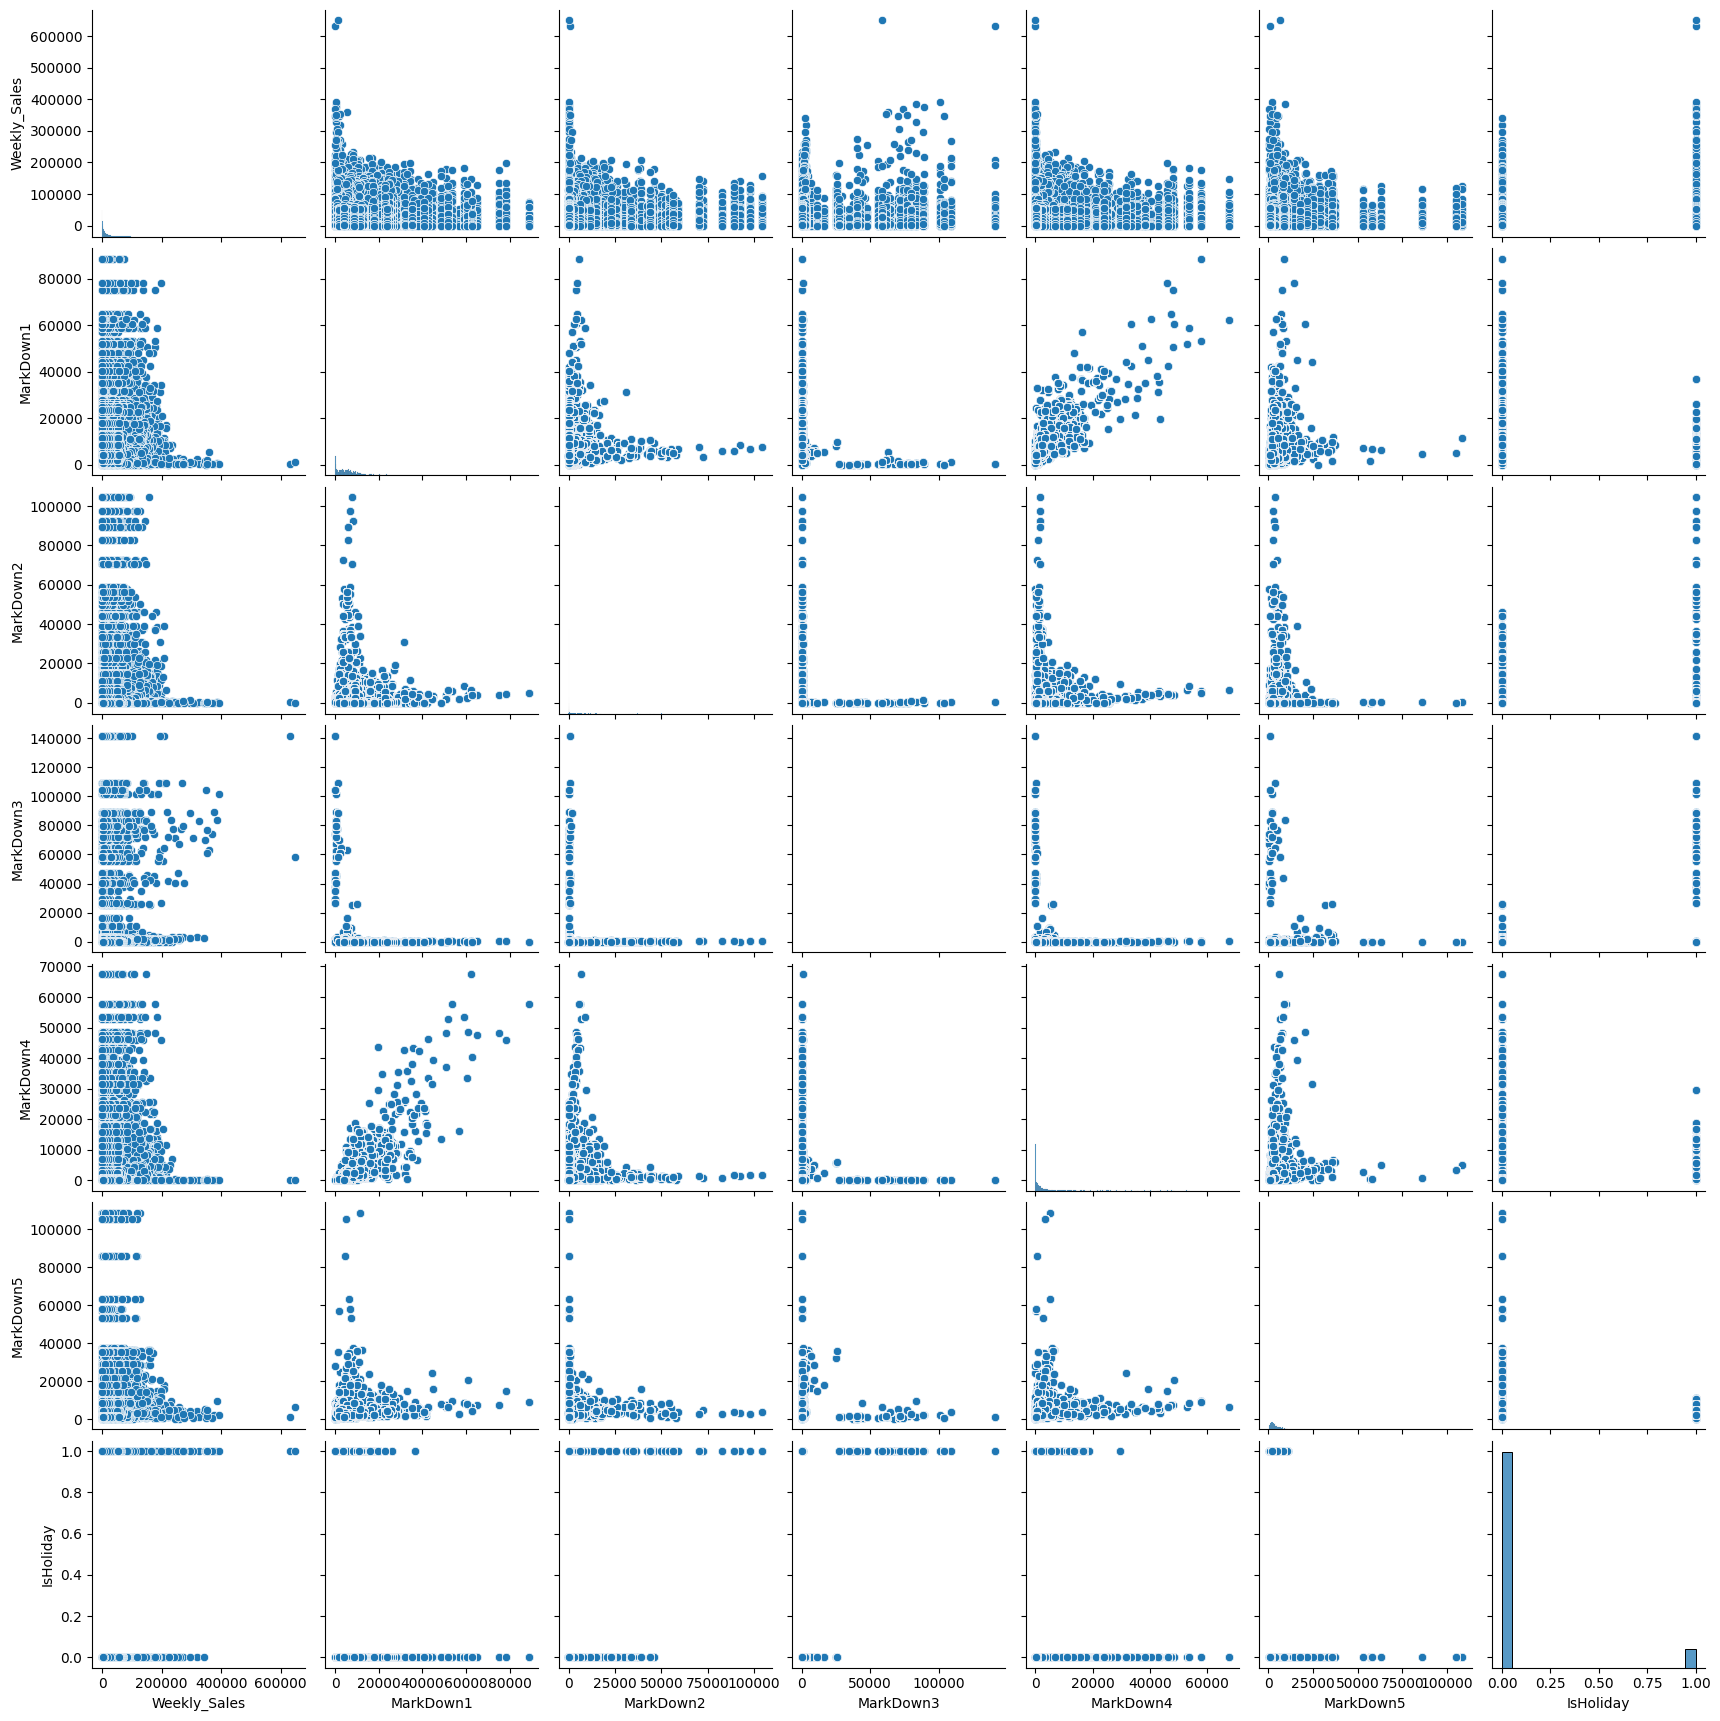

In [ ]:
# EDA
sns.pairplot(data[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday']])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Feature engineering
data['IsHoliday'] = data['IsHoliday'].astype(int)  # Convert 'IsHoliday' to binary indicator

# Model building
X = data[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']]
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Interpretation and recommendations
# Analyze coefficients to understand the impact of markdowns on holiday weeks
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Absolute Error: 15254.493709348615
        Feature  Coefficient
0   Temperature    29.612670
1    Fuel_Price  -415.713554
2     MarkDown1     0.299826
3     MarkDown2     0.107248
4     MarkDown3     0.201302
5     MarkDown4    -0.126831
6     MarkDown5     0.304947
7           CPI   -19.771527
8  Unemployment  -635.027907
9     IsHoliday -1496.918012


**Mean Absolute Error (MAE):** The MAE measures the average absolute difference between the predicted values and the actual values. In this case, the MAE is approximately 15254.49.

**Feature Coefficients:** The coefficients represent the change in the target variable (weekly sales) for a one-unit change in each feature, holding all other features constant. Here's a brief interpretation of the coefficients:

**Temperature:** For every one-unit increase in temperature (in the given unit), weekly sales are expected to increase by approximately 29.61 units.

**Fuel_Price:** For every one-unit increase in fuel price (in the given unit), weekly sales are expected to decrease by approximately 415.71 units.

**MarkDown1 to MarkDown5:** These coefficients represent the impact of markdowns on weekly sales. For example, for every one-unit increase in MarkDown1, weekly sales are expected to increase by approximately 0.30 units.

**CPI:** For every one-unit increase in CPI (Consumer Price Index), weekly sales are expected to decrease by approximately 19.77 units.

Unemployment: For every one-unit increase in unemployment rate, weekly sales are expected to decrease by approximately 635.03 units.

**IsHoliday**: If a week is a holiday (IsHoliday = 1), weekly sales are expected to decrease by approximately 1496.92 units compared to non-holiday weeks.

These coefficients provide insights into the impact of each feature on weekly sales, which can be valuable for understanding the drivers of sales performance and informing business decisions.






